In [ ]:
from surprise import SVD
from surprise import Dataset, NormalPredictor, KNNWithZScore, Reader
from surprise.model_selection import cross_validate, train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./clean_data/movies_data.csv')
# Swap "movieId" and "userId" columns
df = df[["userId", "movieId", "rating"]]
# A reader is still needed but only the rating_scale param is required.
reader = Reader(rating_scale=(1, 5), skip_lines=1)

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[["userId", "movieId", "rating"]], reader)
sim_options_1 = {
    "name": "cosine",
    "user_based": True  # compute cosine similarity between users
}
# We can now use this dataset as we please, e.g. calling cross_validate
cv_1 = cross_validate(KNNWithZScore(sim_options=sim_options_1), data)   

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [14]:
sim_options_2 = {
    "name": "pearson",
    "user_based": True  # compute pearson similarity between users
}
cv_2 = cross_validate(KNNWithZScore(sim_options=sim_options_2), data)   

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [15]:
sim_options_3 = {
    "name": "cosine",
    "user_based": False  # compute  similarities between items
}
cv_3 = cross_validate(KNNWithZScore(sim_options=sim_options_3), data)   

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [16]:
sim_options_4 = {
    "name": "pearson",
    "user_based": False  # compute  similarities between items
}
cv_4 = cross_validate(KNNWithZScore(sim_options=sim_options_4), data)   

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


RMSE values: [0.8972369062171952, 0.892778998428248, 0.9101501212564385, 0.9068045144013773]
MAE values: [0.6815567714057502, 0.6746968908441711, 0.6943580077090215, 0.6899549497649649]


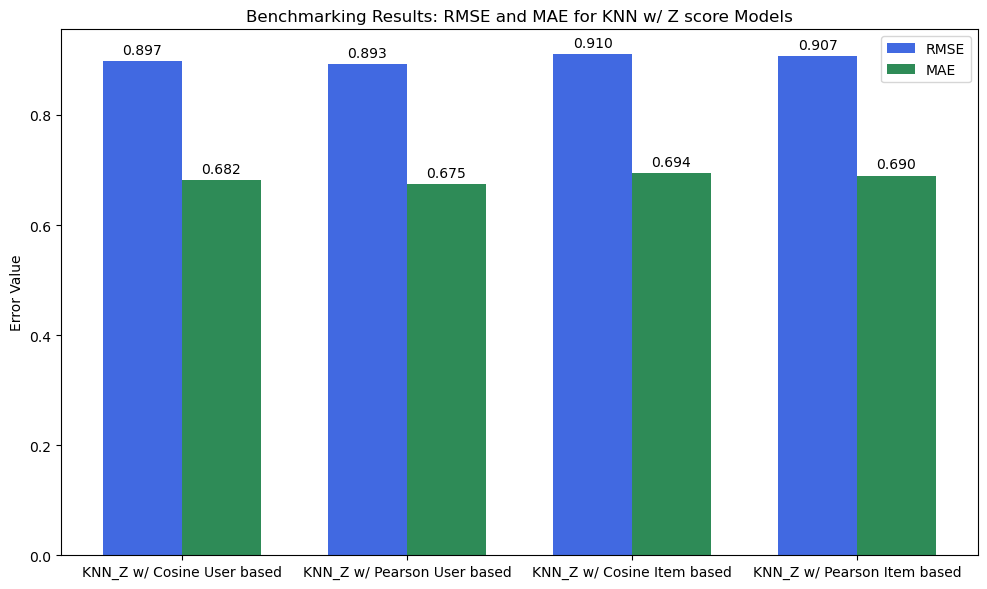

In [ ]:
# Take mean  RMSE/MSE values of our results
test_rmse_1 = cv_1["test_rmse"].mean()
test_rmse_2 = cv_2["test_rmse"].mean()
test_rmse_3 = cv_3["test_rmse"].mean()
test_rmse_4 = cv_4["test_rmse"].mean()

test_mae_1 = cv_1["test_mae"].mean()
test_mae_2 = cv_2["test_mae"].mean()
test_mae_3 = cv_3["test_mae"].mean()
test_mae_4 = cv_4["test_mae"].mean()

rmse_values = [test_rmse_1, test_rmse_2, test_rmse_3, test_rmse_4]
mae_values = [test_mae_1, test_mae_2, test_mae_3, test_mae_4]
print("RMSE values:", rmse_values)
print("MAE values:", mae_values)

# Bar chart for benchmarking
labels = ['KNN_Z w/ Cosine User based', 'KNN_Z w/ Pearson User based', 'KNN_Z w/ Cosine Item based', 'KNN_Z w/ Pearson Item based']

x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE', color='royalblue')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE', color='seagreen')
ax.set_ylabel('Error Value')
ax.set_title('Benchmarking Results: RMSE and MAE for KNN w/ Z score Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [ ]:
sim_options_3 = {
    "name": "cosine",
    "user_based": False  # compute  similarities between items
}
model = KNNWithZScore(sim_options=sim_options_3)

trainset, testset = train_test_split(data, test_size=0.25)

model.fit(trainset)
predictions = model.test(testset)

print(len(predictions), " items in total")
impossible_to_predict = 0 
# Ex of prediction : user: 86  item: 6373  r_ui = 4.00  est = 3.59  {'actual_k': 40, 'was_impossible': False}
for i in range (len(predictions)):
    if predictions[i].details['was_impossible'] == True:
        impossible_to_predict += 1
print(impossible_to_predict, " items were impossible to predict")
# Group up predicted objects by userId, and add a counter so that we can see how many movies this user has rated
predictions_df = pd.DataFrame(predictions, columns=['userId', 'movieId', 'r_ui', 'est', 'details'])
predictions_by_userid_df = predictions_df.drop('details', axis=1)
predictions_by_userid_df['userId'] = predictions_by_userid_df['userId'].astype(int)
predictions_by_userid_df['movieId'] = predictions_by_userid_df['movieId'].astype(int)
predictions_by_userid_df['r_ui'] = predictions_by_userid_df['r_ui'].astype(float)
predictions_by_userid_df['real_rating'] = predictions_by_userid_df['r_ui']
predictions_by_userid_df = predictions_by_userid_df.drop('r_ui', axis=1)
predictions_by_userid_df['est'] = predictions_by_userid_df['est'].astype(float)
predictions_by_userid_df['est'] = predictions_by_userid_df['est'].round(1)
predictions_by_userid_df['estimated_rating'] = predictions_by_userid_df['est']
predictions_by_userid_df = predictions_by_userid_df.drop('est', axis=1)
predictions_by_userid_df['counter'] = predictions_by_userid_df.groupby('userId')['userId'].transform('count')
predictions_by_userid_df['counter'] = predictions_by_userid_df['counter'].astype(int)
predictions_by_userid_df = predictions_by_userid_df.drop('movieId', axis=1)
predictions_by_userid_df = predictions_by_userid_df.groupby('userId').agg('mean')
# Sort by counter in descending order
predictions_by_userid_df = predictions_by_userid_df.sort_values(by=['counter'], ascending=False)
predictions_by_userid_df.head()



Computing the cosine similarity matrix...
Done computing similarity matrix.
25209  items in total
1075  items were impossible to predict


,real_rating,estimated_rating,counter
userId,,,
414,3.381356,3.382435,649.0
599,2.621815,2.877070,628.0
474,3.398887,3.337106,539.0
448,2.777207,3.083984,487.0
610,3.693498,3.623220,323.0


In [75]:
# Sort by counter in ascending order
predictions_by_userid_df = predictions_by_userid_df.sort_values(by=['counter'], ascending=True)
predictions_by_userid_df.head()

,real_rating,estimated_rating,counter
userId,,,
26,3.00,2.90,1.0
180,3.00,3.65,2.0
442,1.50,1.30,2.0
407,3.75,4.30,2.0
333,3.00,3.10,2.0


In [77]:
# Only keep data where counter is less or equal than 5
low_amnt_of_ratings_df = predictions_by_userid_df[predictions_by_userid_df['counter'] <= 5]
print("There are ", len(low_amnt_of_ratings_df), " users with less or equal than 5 ratings")
# Now do the mean real_rating and estimatied_rating, and output the difference 
low_amnt_of_ratings_df['mean_real_rating'] = low_amnt_of_ratings_df['real_rating'].mean()
low_amnt_of_ratings_df['mean_estimated_rating'] = low_amnt_of_ratings_df['estimated_rating'].mean()
low_amnt_of_ratings_df['difference'] = low_amnt_of_ratings_df['mean_real_rating'] - low_amnt_of_ratings_df['mean_estimated_rating']
low_amnt_of_ratings_df.iloc[0]

There are  45  users with less or equal than 5 ratings


C:\Users\USER\AppData\Local\Temp\ipykernel_14028\1348339672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_amnt_of_ratings_df['mean_real_rating'] = low_amnt_of_ratings_df['real_rating'].mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_14028\1348339672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_amnt_of_ratings_df['mean_estimated_rating'] = low_amnt_of_ratings_df['estimated_rating'].mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_14028\1348339672.py:7: SettingWithCopyWarning: 
A value

real_rating              3.000000
estimated_rating         2.900000
counter                  1.000000
mean_real_rating         3.561667
mean_estimated_rating    3.590296
difference              -0.028630
Name: 26, dtype: float64

In [78]:
# Only keep data where counter is more or equal than 100
high_amnt_of_ratings_df = predictions_by_userid_df[predictions_by_userid_df['counter'] >= 100]
print("There are ", len(high_amnt_of_ratings_df), " users with more or equal than 100 ratings")
# Now do the mean real_rating and estimatied_rating, and output the difference 
high_amnt_of_ratings_df['mean_real_rating'] = high_amnt_of_ratings_df['real_rating'].mean()
high_amnt_of_ratings_df['mean_estimated_rating'] = high_amnt_of_ratings_df['estimated_rating'].mean()
high_amnt_of_ratings_df['difference'] = high_amnt_of_ratings_df['mean_real_rating'] - high_amnt_of_ratings_df['mean_estimated_rating']
high_amnt_of_ratings_df.iloc[0]

There are  62  users with more or equal than 100 ratings


C:\Users\USER\AppData\Local\Temp\ipykernel_14028\3433487747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_amnt_of_ratings_df['mean_real_rating'] = high_amnt_of_ratings_df['real_rating'].mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_14028\3433487747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_amnt_of_ratings_df['mean_estimated_rating'] = high_amnt_of_ratings_df['estimated_rating'].mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_14028\3433487747.py:7: SettingWithCopyWarning: 
A v

real_rating                3.535000
estimated_rating           3.483000
counter                  100.000000
mean_real_rating           3.353704
mean_estimated_rating      3.369458
difference                -0.015754
Name: 199, dtype: float64

We can see that the difference between the real and estimated rating of our KNN w/ Z score model are low for both users with less or equal than 5 ratings and users with more or equal than 100 ratings. Still, even though it's seems logical, people that rate less than 5 movies have a higher difference between the real and estimated rating than people that rate more than 100 movies. Also, we can note that 1075  items were impossible to predict out of the 25209 total items, but it's not an issue.

In [79]:
# Group up predicted objects by itemId, and add a counter so that we can see how many movies this user has rated
predictions_df = pd.DataFrame(predictions, columns=['userId', 'movieId', 'r_ui', 'est', 'details'])
predictions_by_itemId_df = predictions_df.drop('details', axis=1)
predictions_by_itemId_df['userId'] = predictions_by_itemId_df['userId'].astype(int)
predictions_by_itemId_df['movieId'] = predictions_by_itemId_df['movieId'].astype(int)
predictions_by_itemId_df['r_ui'] = predictions_by_itemId_df['r_ui'].astype(float)
predictions_by_itemId_df['real_rating'] = predictions_by_itemId_df['r_ui']
predictions_by_itemId_df = predictions_by_itemId_df.drop('r_ui', axis=1)
predictions_by_itemId_df['est'] = predictions_by_itemId_df['est'].astype(float)
predictions_by_itemId_df['est'] = predictions_by_itemId_df['est'].round(1)
predictions_by_itemId_df['estimated_rating'] = predictions_by_itemId_df['est']
predictions_by_itemId_df = predictions_by_itemId_df.drop('est', axis=1)
predictions_by_itemId_df['counter'] = predictions_by_itemId_df.groupby('movieId')['movieId'].transform('count')
predictions_by_itemId_df['counter'] = predictions_by_itemId_df['counter'].astype(int)
predictions_by_itemId_df = predictions_by_itemId_df.drop('userId', axis=1)
predictions_by_itemId_df = predictions_by_itemId_df.groupby('movieId').agg('mean')
# Sort by counter in descending order
predictions_by_itemId_df = predictions_by_itemId_df.sort_values(by=['counter'], ascending=False)
predictions_by_itemId_df.head()


,real_rating,estimated_rating,counter
movieId,,,
2571,4.048387,4.336559,93.0
356,4.302198,4.193407,91.0
296,4.176136,4.198864,88.0
318,4.371951,4.520732,82.0
593,4.264706,4.241176,68.0


In [80]:
# Sort by counter in ascending order
predictions_by_itemId_df = predictions_by_itemId_df.sort_values(by=['counter'], ascending=True)
predictions_by_itemId_df.head()

,real_rating,estimated_rating,counter
movieId,,,
191005,4.5,3.5,1.0
92760,3.5,3.5,1.0
92730,2.0,3.5,1.0
92694,4.5,4.2,1.0
92643,5.0,2.5,1.0


In [ ]:
# Only keep data where counter is less or equal than 3
low_amnt_of_mv_ratings_df = predictions_by_itemId_df[predictions_by_itemId_df['counter'] <= 3]
print("There are ", len(low_amnt_of_ratings_df), " movies with less or equal than 3 ratings")
# Now do the mean real_rating and estimatied_rating, and output the difference 
low_amnt_of_mv_ratings_df['mean_real_rating'] = low_amnt_of_mv_ratings_df['real_rating'].mean()
low_amnt_of_mv_ratings_df['mean_estimated_rating'] = low_amnt_of_mv_ratings_df['estimated_rating'].mean()
low_amnt_of_mv_ratings_df['difference'] = low_amnt_of_mv_ratings_df['mean_real_rating'] - low_amnt_of_mv_ratings_df['mean_estimated_rating']
low_amnt_of_mv_ratings_df.iloc[0]

There are  45  movies with less or equal than 3 ratings


C:\Users\USER\AppData\Local\Temp\ipykernel_14028\2864081809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_amnt_of_mv_ratings_df['mean_real_rating'] = low_amnt_of_mv_ratings_df['real_rating'].mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_14028\2864081809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_amnt_of_mv_ratings_df['mean_estimated_rating'] = low_amnt_of_mv_ratings_df['estimated_rating'].mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_14028\2864081809.py:7: SettingWithCopyWarni

real_rating              4.500000
estimated_rating         3.500000
counter                  1.000000
mean_real_rating         3.209788
mean_estimated_rating    3.259839
difference              -0.050051
Name: 191005, dtype: float64

In [83]:
# Only keep data where counter is more or equal than 50
high_amnt_of_mv_ratings_df = predictions_by_itemId_df[predictions_by_itemId_df['counter'] >= 50]
print("There are ", len(high_amnt_of_mv_ratings_df), " movies with more or equal than 50 ratings")
# Now do the mean real_rating and estimatied_rating, and output the difference 
high_amnt_of_mv_ratings_df['mean_real_rating'] = high_amnt_of_mv_ratings_df['real_rating'].mean()
high_amnt_of_mv_ratings_df['mean_estimated_rating'] = high_amnt_of_mv_ratings_df['estimated_rating'].mean()
high_amnt_of_mv_ratings_df['difference'] = high_amnt_of_mv_ratings_df['mean_real_rating'] - high_amnt_of_mv_ratings_df['mean_estimated_rating']
high_amnt_of_mv_ratings_df.iloc[0]

There are  21  movies with more or equal than 50 ratings


C:\Users\USER\AppData\Local\Temp\ipykernel_14028\4006632364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_amnt_of_mv_ratings_df['mean_real_rating'] = high_amnt_of_mv_ratings_df['real_rating'].mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_14028\4006632364.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_amnt_of_mv_ratings_df['mean_estimated_rating'] = high_amnt_of_mv_ratings_df['estimated_rating'].mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_14028\4006632364.py:7: SettingWithCopyW

real_rating               4.330000
estimated_rating          4.180000
counter                  50.000000
mean_real_rating          4.101208
mean_estimated_rating     4.164662
difference               -0.063454
Name: 1198, dtype: float64

As like before, loss difference is very minimal, this time difference is much closer.